<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# feel free to import other libraries! 

In [10]:
df = pd.read_csv('states_edu.csv')

Chosen test: **<4 grade math>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [4]:
df.head()


,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [11]:
df = df.dropna()
df = df.drop(["AVG_READING_4_SCORE", "AVG_READING_8_SCORE", "GRADES_4_G", "GRADES_12_G", "GRADES_9_12_G", "GRADES_PK_G", "GRADES_KG_G"], axis=1)
df["fed%"] = df["FEDERAL_REVENUE"] / df["TOTAL_REVENUE"]
df["state%"] = df["STATE_REVENUE"] / df["TOTAL_REVENUE"]
df["local%"] = df["LOCAL_REVENUE"] / df["TOTAL_REVENUE"]
df.head()
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_8_G', 'GRADES_1_8_G',
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'fed%',
       'state%', 'local%'],
      dtype='object')

Final feature list: **<'PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_8_G', 'GRADES_1_8_G',
       'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'fed%',
       'state%', 'local%'>**

Feature selection justification: **<Kept all data about students, as well as scores from grade 4 and 8 in math only
>**

<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Revenue vs Math Scores')

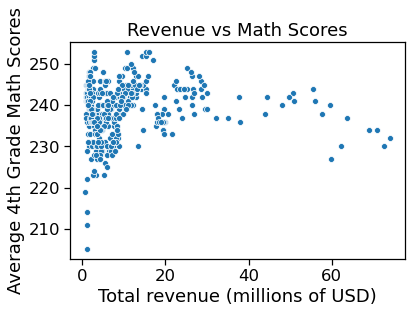

In [12]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.dark_palette(color="#326fa8")
sns.scatterplot(df["TOTAL_REVENUE"] / 1000000, df["AVG_MATH_4_SCORE"])
plt.xlabel("Total revenue (millions of USD)")
plt.ylabel("Average 4th Grade Math Scores")
plt.title("Revenue vs Math Scores")

total revenue vs average scores for 4th grade math scores

Visualization 2

Text(0.5, 0, 'Average Math Scores of 4th Graders')

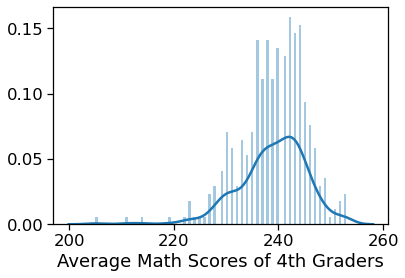

In [13]:

sns.distplot(df["AVG_MATH_4_SCORE"], bins=100)
plt.xlabel("Average Math Scores of 4th Graders")

avg math scores among 4th graders

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = df[["fed%", "state%", "local%"]].dropna()
y = df["AVG_MATH_4_SCORE"].dropna()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [21]:
# import your sklearn class here
from sklearn.linear_model import TweedieRegressor

In [22]:
# create your model here
model = TweedieRegressor(power=1, alpha=0.5, link ='log')

In [23]:
model.fit(X_train, y_train)

TweedieRegressor(alpha=0.5, link='log', power=1)

In [24]:
y_pred = model.predict(X_test)

In [ ]:
# for classification:
#from sklearn.metrics import plot_confusion_matrix

#plot_confusion_matrix(model, X_test, y_test,
                        # cmap=plt.cm.Blues)

Text(0, 0.5, 'AVG 4th Grader Maths Score')

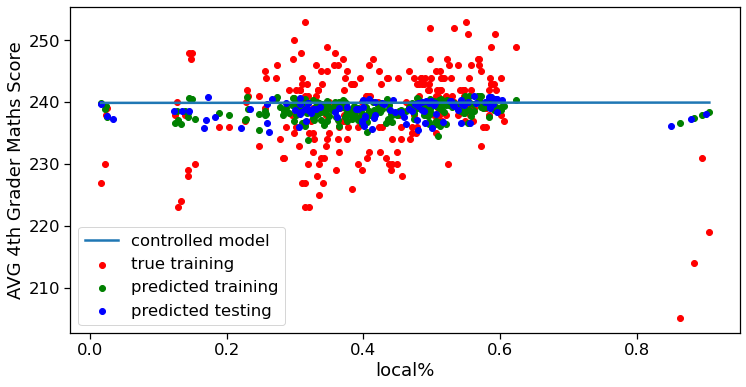

In [26]:
# for regression: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = "local%"
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel("AVG 4th Grader Maths Score")

In [27]:
print(model.score(X_test, y_test))
print(np.mean(model.predict(X_test)-y_test))
print(np.mean(np.abs(model.predict(X_test)-y_test)))
print(np.mean((model.predict(X_test)-y_test)**2)**0.5)
print(model.intercept_)
print(model.coef_)

0.1443180710021138
-0.4900796235794341
4.662340660117132
5.9603511538756795
5.435703615353853
[-0.11256839  0.05863694  0.05394591]


<h2> Summary </h2>

I used the tweedie regressor to generate a poisson distribution to see the correlation between test scores of 4th graders and the link to average funding. this will show if there is a link between funding and better scores. the model generated does not show this, I assume because 4th grade scores are less influenced by educationand more by natural intelligence.